<a href="https://colab.research.google.com/github/ajengayufc/Basic-Processing-Data/blob/main/data%20Analyst%20with%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYST WITH PYTHON**

REVIEW EXPLORATORY DATA ANALYSIS
1. Import data dari modul
2. Analisis Individual Feature Patterns menggunakan Visualization
3. Analisis Statistik Deskriptif
4. Dasar pengelompokan korelasi dan penyebab
5. ANOVA


**1 IMPORT DATA FROM MODULE 2**

In [2]:
import pandas as pd
import numpy as np
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


**2. ANALYZING INDIVIDUAL FEARURE PATTERNS USING VISUALIZATION**

In [3]:
%%capture
! pip install seaborn

Sebelum melakukan visualisasi variabel individu, maka penting untuk mengetahui jenis variabel yang akan dikerjakan. jenis variabel akan mempermudah kita untuk menemukan metode yang tepat untuk melakukan visualisasi

In [4]:
import matplotlib.pyplot as plt     #instal paket matplotlib dan seaborn
import seaborn as sns
%matplotlib inline

In [5]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


kita dapat menghitung korelasi antara variabel type '**int64**' atau '**float64**' menggunakan metode 'corr'

In [6]:
df.corr()     #digunakan untuk mengetahui korelasi antara beberapa kolom

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Kita dapat mencari morelasi antara beberapa kolom seperti : bore, stroke, compression-ratio dan horsepower

In [7]:
df[['bore','stroke' ,'compression-ratio','horsepower']]   #menampilkan data sesuai dengan kolom yang dipanggil

,bore,stroke,compression-ratio,horsepower
0,3.47,2.68,9.0,111.0
1,3.47,2.68,9.0,111.0
2,2.68,3.47,9.0,154.0
3,3.19,3.40,10.0,102.0
4,3.19,3.40,8.0,115.0
...,...,...,...,...
196,3.78,3.15,9.5,114.0
197,3.78,3.15,8.7,160.0
198,3.58,2.87,8.8,134.0
199,3.01,3.40,23.0,106.0


setelah menampillkan kolom bore, stroke, compression-ratio dan horsepower. langkah selanjutnya adalah mengetahui hubungan antara variabel individu dengan harga. Gunakan "regplot" yang dapat melakukan plot scatterplot dengan garis regresi seuai dengan data

**positive linier relationship**

(0.0, 52998.07888560153)

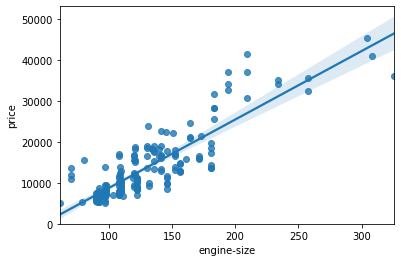

In [8]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Penjelasan : Dari plot diatas, dapat diketahui bahwa semakin besar mesin, maka harga semakin tinggi. Hal ini menunjukkan korelasi antara variabel harga/price dengan ukuran mesin/engine size. Ukuran mesin menjadi prediktor harga yang bagus karena menampilkan garis regresi yang hampir sempurna

In [9]:
df[["engine-size", "price"]].corr()     #digunakan untuk melihat korelasi antara harga dan ukuran mesin

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


dari tabel diatas diketahui korelasi antara harga dan ukuran mesin adalah 0.87

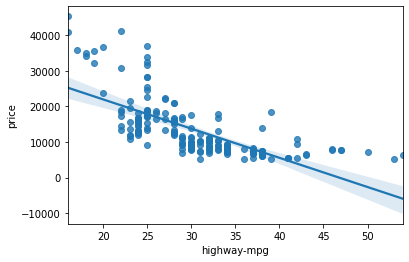

In [10]:
sns.regplot(x="highway-mpg", y="price", data=df)

dari grafik diatas, diketahui bahwa hubungan highway-mpg dengan harga adalah negatif/terbalik. highway-mpg berpotensi sebagai prediktor harga. 

In [11]:
df[['highway-mpg', 'price']].corr()   #highway mpg adalah prediksi potensial dari variabel harga

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


korelasi antara kedua variabel diatas adalah negatif, yaitu -0.704

**weak linier relationship**

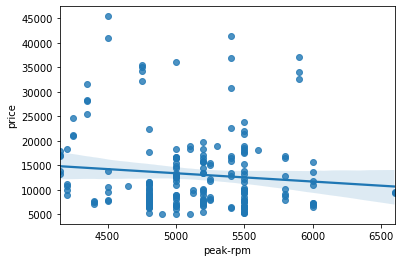

In [12]:
#WEAK LINIER RELATIONSHIP
sns.regplot(x="peak-rpm", y="price", data=df)

Dari plot diatas,  peak-rpm tidak dapat dijadikan sebagai PREDIKTOR. karena hubungan antara peak-rpm dengan harga menghasilkan garis regresi yang mendekati horizontal. Titik-titik yang tersebar sangat jauh dari garis regresi. Oleh karena itu, peak-rpm tidak dapat dijadikan sebagai variabel yang dapat diandalkan

In [13]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


hasil korelasi antara kedua variabel diatas adalah -0.101

In [14]:
#MENEMUKAN KORELASI STROKE DENGAN PRICE

df[["stroke","price"]]      #tampilkan tabel stroke dan price

,stroke,price
0,2.68,13495.0
1,2.68,16500.0
2,3.47,16500.0
3,3.40,13950.0
4,3.40,17450.0
...,...,...
196,3.15,16845.0
197,3.15,19045.0
198,2.87,21485.0
199,3.40,22470.0


(0.0, 47414.1)

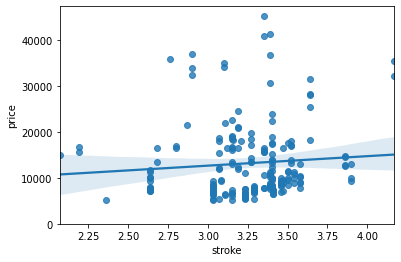

In [15]:
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

dari hasil diatas, dapat diketahui bahwa stroke tidak dapat digunakan sebagai prediktor dikarenakan hasil regresi antara stroke dengan price mendekati garis horizontal

In [16]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


hasil korelasi antara stroke dengan price adalah 0.082

**VARIABEL KATEGORI** adalah variabel yang mengambarkan karakteristik dari unit data dan dipilih dari sekelompok kecil kategori. Variabel kategori dapat memiliki tipe "objek" atau "int64". Cara untuk memvisualisasikan variabel kategori adalah dengan boxplot

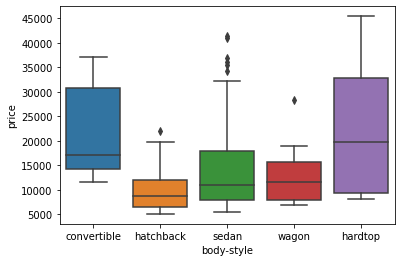

In [17]:
# VARIABEL KATEGORI
sns.boxplot(x="body-style", y="price", data=df)

dari boxplot diatas dapat dilihat bahwa kategory body style yang berbeda sangat tumpang tindih. sehingga body style tidak akan menjadi prediktor harga yang baik

boxplot engine location dan price

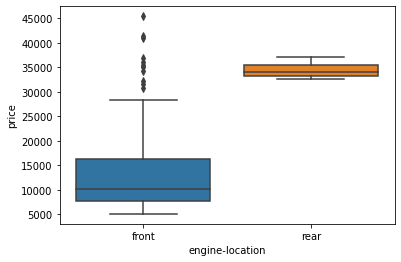

In [18]:
sns.boxplot(x="engine-location", y="price", data=df)

dapat dilihat bahwa distribusi harga antara 2 kategori mesin front(depan) dan rear(belakang) cukup berbeda untuk menjadikan enginee location sebagai prediktor harga yang potensial

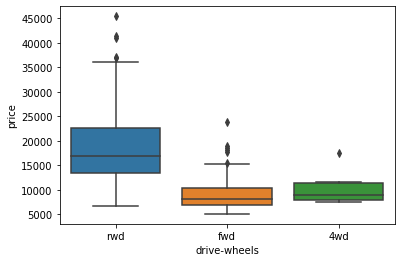

In [19]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

distribusi antara drive-wheels rwd, fwd dan 4wd berbeda beda. Drive wheels dapat berpotensi sebagai prediktor harga

3.** DESCRIPTIVE STATISTICAL ANALYSIS**


fungsi deskripsi secara otomatis mengj=hitung statistik dasar semua variabel kontinyu. Nilai NaN secara otomatis akan terlewati dalam metode ini.

Hal ini menunjukkan
1. Jumlah variabel 
2. Rata-rata
3. simpangan baku (std)
4. Nilai minimum
5. Nilai rentang IQR(rentang inter quartil : 25%, 50%, dan 75%) 
6. nilai maksimum

In [20]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [21]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [22]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

**VALUE COUNTS**

nilai ini adalah cara untuk memahami banyak unit dari setiap karakteristik/variabel. dengan menggunakan metode "value_counts" pada kolom 'drive-wheels.  Metode "value_counts" **hanya dapat diginakan pada pandas, bukan pandas dataframe**. "df['drive=wheels']", bukan "df[['drive-wheels']]"

In [23]:
df['drive-wheels'].value_counts().to_frame()    #dapat diubah ke dataframe

,drive-wheels
fwd,118
rwd,75
4wd,8


menyimpan dalam bentuk dataframe "drive_wheels_counts" dan ubah nama kolom'drive-wheels' menjadi 'value_counts'

In [24]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


rename index menjadi 'drive-wheels'

In [25]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


ulangi langkah diatas, simpan ke dataframe dan ubah nama data untuk kolom 'engine-location'

In [26]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


engine-location tidak akan menjadi variabel prediktor untuk price. karena dari data diatas hanya memiliki 3 mesin mobil dengan mesin dibelakang dan 198 dengan mesin didepan. tidak ada kesimpulan untuk 'engine-location'

4. **BASIC OF GROUPING**
metode ini mengelompokkan data menurut kategori yang berbeda. Data dikelompokkan berdasarkan satu atau beberapa variabel dan analisis pada kelompok individu


Contoh : kelompokkan "drive-wheels". Kita dapat melihat 3 kategori drive-wheels yang berbeda

In [27]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Jika ingin mengetahui rata-rata jenis 'drive-wheels' mana yang paling memiliki nilai, kita dapat mengelompokkan ' drive-wheels' dan kemudian membuat rata-ratanya. 
pilih kolom' drive-wheels', 'body-syle' dan 'price' lalu tetapkan dengan variable **'df_group_one'**

In [28]:
df_group_one = df[['drive-wheels','body-style','price']]

hitung rata-rata harga dari setiap kategori data

In [29]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


dari data diatas, dapat diketahui bahwa rwd/roda belakang memiliki rata-rata paling mahal. sedangkan fwd/depan dan 4wd/4 roda memiliki harga rata-rata yang hampir sama. 

langkah selanjutnya adalah mengelompokkan variabel ' drive-wheels' dan 'body-style'. Simpan hasilnya dalam variabel **'grouped_test1,**

In [30]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Data diatas dapat dikelompokkan menjadi tabel pivot, karena lebih mudah untuk visualisai. Data tersebut dapat dikonversi menjadi tabel pivot dengan metode 'pivot' untuk membuat gtabel pivot dari grup. 


dalam tabel, variabel drive-wheel sebagai baris tabel, dan pivot body-style sebagai kolom tabel

In [31]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

Apabila tidak memiliki data untuk sel pivot. maka dapat dilakukan dengan mengisi sel yang hilang dengan nilai 0. 

In [32]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

@@@ Gunakan fungsi "groupby" untuk mencari "harga" rata-rata setiap mobil berdasarkan "body-style" 

In [33]:
import matplotlib.pyplot as plt     #import pyplot
%matplotlib inline 

variabel berupa : drive-wheels dan body-style vs price



gunakan heat map untuk menggambarkan hubungan antara Body-style vs price

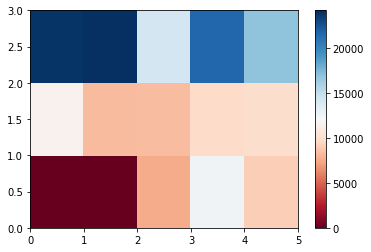

In [34]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

heatmap memplot variabel 'price' yang sebanding dengan variabel 'drive-wheels' dan 'body-style'. 

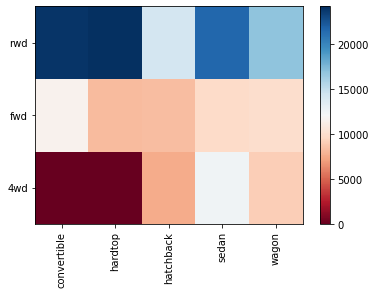

In [ ]:
## mengubah default
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

visualisai sangat penting pada data science, paket visualisasi Python memberikan kebebasan yang besar. Pertanyaan dari hasil diatas adalah
1. Apa karakteristik yang paling berpengaruh terhadap harga mobil?
2. Bagaimana harga mobil tergantung pada variabel tersebut?

**5. Correlation and Causation**

**Correlation** : adalah ukuran ketergantungan antar variabel
**Causation** : adalah hubungan sebab dan akibat antara dua variabel


korelasi tidak tergantung dengan sebab akibat. 

**Pearson Correlation** / Korelasi Pearson

adalah korelasi yang mengukur ketergantunagn linier antara 2 variabel X dan Y. koefisien yang dihasilkan memiliki nilai antara -1 dan 1. dimana:

1 :  korelasi linier positif
0 : tidak memiliki korelasi, kedua variabel tidak saling mempengaruhi
-1 : korelasi linier negatif


Pearson Correlation adalah metode default dari fungsi "corr". Seperti sebelumnya kita dapat menghitung Korelasi Pearson dari variabel 'int64' atau 'float64'.

In [35]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


**P-VALUE** :
P-value adalah nilai probabilitas bahwa korelasi antara kedua variabel signifikan secara statistik. Tingkat signifikasi 0.05 yang berarti bahwa 95% korelasi antar variabel signifikan. Ketika :

p-value adalah $<$ 0,001: korelasinya signifikan.
nilai p adalah $<$ 0,05: ada bukti moderat bahwa korelasinya signifikan.
nilai p adalah $<$ 0,1: ada bukti lemah bahwa korelasinya signifikan.
nilai p adalah $>$ 0,1: tidak ada bukti bahwa korelasi tersebut signifikan.


Gunakan modul 'stats' di library 'scipy'

In [36]:
from scipy import stats

**Wheel-base vs Price**

hitung Pearson Correlation Coefficient dan P-value dari 'wheel-base' dan ''price'

In [37]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


Hasil : Karena nilai P-value adalah < 0.001, korelasi antara wheel-base dan price signifikan secara statistik, meskipun liniernya tidak terlalu kuat yaitu 0.58

**`Horsepower vs Price`**

hitung Pearson Correlation Coefficient dan P-value dari 'horsepower' dan ''price'

In [38]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428260101e-48


hasil : Karena P-value adalah < 0.001, korelasi antara horsepower dengan price signifikan secara statistik dan hubungan liniernya mendekati kuat yaitu 0.809, mendekati 1

**`Length vs Price`**

hitung Pearson Correlation Coefficient dan P-value dari 'lenght' dan ''price'

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159556e-30


hasil : Karena P-value adalah < 0.001, korelasi antara length dengan price signifikan secara statistik dan hubungan liniernya tidak terlalu kuat yaitu 0.69

**Width vs Price**

hitung Pearson Correlation Coefficient dan P-value dari 'width' dan ''price'

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


hasil : Karena P-value adalah < 0.001, korelasi antara width dengan price signifikan secara statistik dan hubungan liniernya mendekati kuat yaitu 0.751

**Curb-weight vs Price**

hitung Pearson Correlation Coefficient dan P-value dari 'curb-weight' dan ''price'

In [39]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238894065e-53


hasil : Karena P-value adalah < 0.001, korelasi antara Curb-weight dengan price signifikan secara statistik dan hubungan liniernya mendekati kuat yaitu 0.834

**Engine-size vs Price**

hitung Pearson Correlation Coefficient dan P-value dari 'engine-size' dan ''price'

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


hasil : Karena P-value adalah < 0.001, korelasi antara engine-size dengan price signifikan secara statistik dan hubungan liniernya mendekati kuat yaitu 0.872

**Bore vs Price**

hitung Pearson Correlation Coefficient dan P-value dari 'bore' dan ''price'

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


hasil : Karena P-value adalah < 0.001, korelasi antara bore dengan price signifikan secara statistik dan hubungan liniernya tidak kuat yaitu 0.543

**City-mpg vs Price**

hitung Pearson Correlation Coefficient dan P-value dari 'city-mpg' dan ''price'

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


hasil : Karena P-value adalah < 0.001, korelasi antara bore dengan price signifikan secara statistik dan hubungan liniernya negatif  yaitu -0.685

**Highway-mpg vs Price**

hitung Pearson Correlation Coefficient dan P-value dari 'Highway-mpg' dan ''price'

In [40]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144476358e-31


hasil : Karena P-value adalah < 0.001, korelasi antara bore dengan price signifikan secara statistik dan hubungan liniernya negatif yaitu -0.704

**6. ANOVA**
ANOVA (Analysis of variance The Analysis of Variance)  adalah metode statistik yang digunakan untuk menguji apakah ada perbedaan signifikan antara rata-rata dua kelompok atau lebih. ANOVA mengembalikan dua parameter : 

**F-test score** : ANOVA mengasumsikan rata-rata semua kelompok adalah sama, menghitung seberapa jauh rata-rata yang sebenarnya menyimpang dari asumsi, dan melaporkannya sebagai skor uji-F.Skor yang lebih besar berarti ada perbedaan yang lebih besar antara rata-rata.

**P-value:** P-value menunjukkan seberapa signifikan secara statistik nilai skor yang dihitung.

Jika variabel harga sangat berkorelasi dengan variabel yang dianalisis, perkirakan ANOVA akan mengembalikan skor uji F yang cukup besar dan nilai p yang kecil.



**Drive Wheels**

karena ANOVA menganalisis perbedaan antara kelompok yang berbeda dari variabel yang sama, fungsi **groupby** akan berguna. Karena algoritma ANOVA rata-rata data secara otomatis, tidak perlu mengambil rata-rata sebelumnya.

lihat apakah drive-wheels mempengaruhi price



In [41]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [ ]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


Kita dapat memperoleh nilai dari grup metode menggunakan metode "get_group".

In [42]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

kita dapat menggunakan fungsi 'f_oneway' dalam modul 'stats' untuk mendapatkan skor F-test dan P-value.

In [43]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


skor uji F yang besar menunjukkan korelasi yang kuat dan nilai P hampir 0 menyiratkan signifikansi statistik yang hampir pasti. Tetapi apakah ini berarti ketiga kelompok yang diuji semuanya berkorelasi tinggi?

**Separately : fwd dan rwd**

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


**4wd and rwd**

In [44]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


**4wd dan fwd**

In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


**KESIMPULAN**

variabel sangat penting untuk memberikan informasi mengenai prediksi harga mobil. 

Variabel numerik kontinyu:
- length
- width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Whell-base
- Bore

Variabel Kategori :
- Drive-wheels




